In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Load data

In [2]:
df = pd.read_pickle('Data/BCs/Dataframes/control_data.pkl')
print(df.shape)

(3589, 24)


PCA

In [3]:
labels = ['uv_center', 'uv_surround', 'green_center', 'green_surround']
len_kernel = 1250
assert len(df['uv_center'].iloc[0]) == len_kernel
stop_kernel = int(len_kernel*3/4)

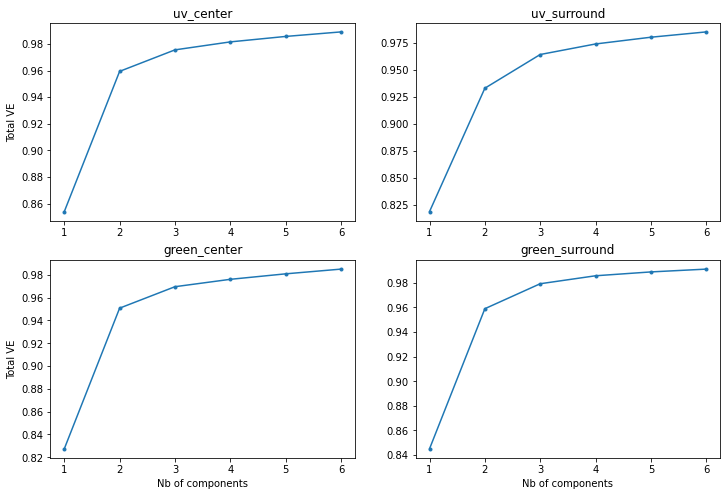

In [4]:
plt.figure(figsize=(12,8))
for index, current_label in enumerate(labels):
    X = np.vstack(df[current_label].to_numpy())[:,0:stop_kernel]
    var = []
    for i in range(1,7):
        pca = PCA(n_components=i, random_state=0)
        pca.fit(X)
        var.append(pca.explained_variance_ratio_.sum())
    plt.subplot(2,2,index+1)
    plt.title(current_label)
    if index == 0 or index == 2:
        plt.ylabel('Total VE')
    plt.plot(np.arange(1,7), var, '.-')
    if index >= 2:
        plt.xlabel('Nb of components')
plt.show()